# This notebook is developed for applying SVM algorithm on the wine quality dataset. SVM stands for support vector machines and uses elegant mathematics with qudratic programming to give an accurate method of classification. It serves as one of the best classification algorithms. Red Wine quality dataset was imported and linear as well as kernel SVM were applied on the same. Classification was done on the basis of score. Any score aboe 6 is taken as good where below 6 is bad.

### Importing the dataset and libraries 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header = None)

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading the first 500 values from the dataset. The condition is put on the wine quality (y column). Any value greater  6 is grouped into one class (good) whereas values below 6 are grouped as another class (bad).

In [2]:
X = df.iloc[1:500, [1,10]].values
y = df.iloc[1:500, 11].values
y = np.where(y <= '6', -1, 1)
X=X.astype(float)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Setting the plotting function. The markers, colors, legends, type of plot, area of plot etc. is specified for the dataset rows.

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)
# highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

### This is where the svm function is imported from the sklearn library. It trains on the dataset and gives out the plot result as well as accuracy score on the 30 % test dataset. 

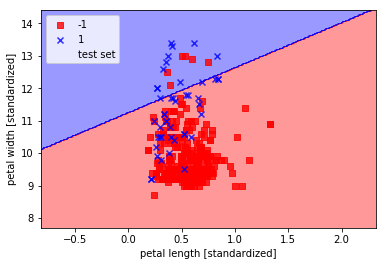

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X_train, y_train)
plot_decision_regions(X_train,y_train, classifier=svm,test_idx=range(0,340))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Accuracy score for the linear SVM

In [6]:
svm.score(X_test,y_test)

0.81999999999999995

### Using kernel SVM. Rbf kernel is used for the task. Kernel SVM maps the data in some higher dimension and can be used for classification for otherwise non separable data. 

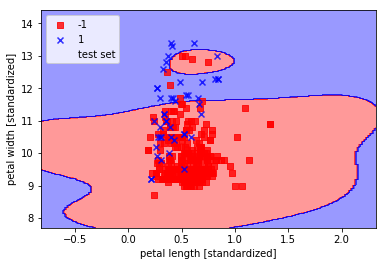

In [7]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=10)
svm.fit(X_train, y_train)
plot_decision_regions(X_train,y_train, classifier=svm,test_idx=range(0,340))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Finding the accuracy using kernel SVM

In [8]:
svm.score(X_test,y_test)

0.81333333333333335